### Reading Dataset

In [15]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Shampoo_Sell.csv")
data.head()
# data.plot()

,Month,Sale
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3


Date Time convert

<Axes: >

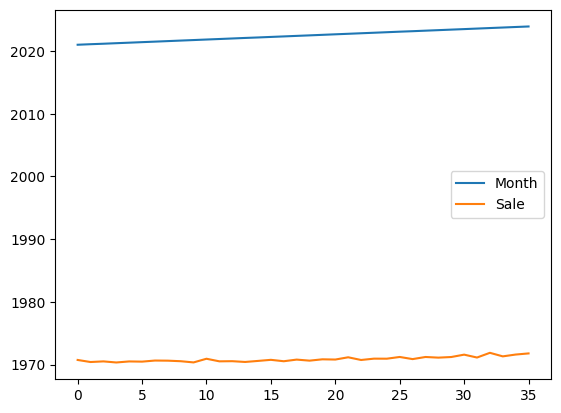

In [16]:
data["Month"] = pd.to_datetime(data["Month"])
data.plot()

In [17]:
data = data.set_index("Month")
data.head()

,Sale
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


In [22]:
data.plot

### Dividing the Dataset into Training & Test Set

In [19]:
size = int(len(data) * 0.80)
train, test = data[:size], data[size:]

### Plotting ACF & PACF

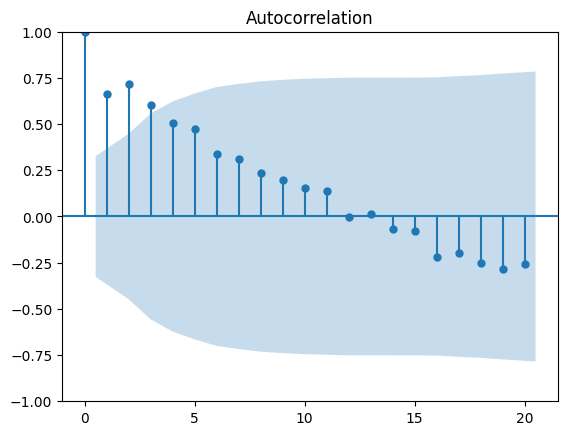

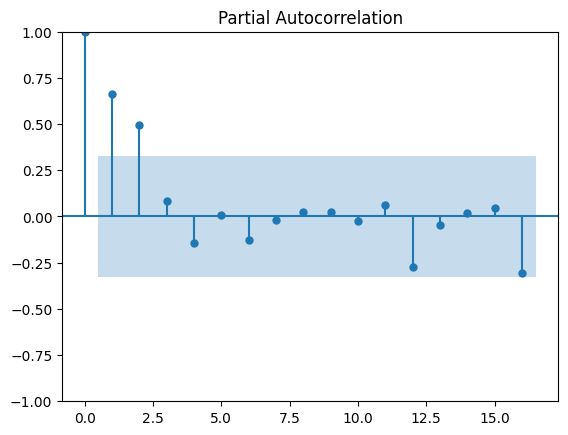

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=20)
plot_pacf(data)
plt.show()

### Finding Optimal p, d, q

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

import itertools
p = d = q = range(0, 5)
pdq_combinations = list(itertools.product(p, d, q))

min_rmse = 10 ** 9
optimal_pdq = (0, 0, 0)

for pdq in pdq_combinations:
    try: 
        model = ARIMA(train, order = pdq).fit()
        predict = model.forecast(len(test))
        error = np.sqrt(mean_squared_error(test, predict))
        if error < min_rmse:
            min_rmse = error
            optimal_pdq = pdq
    except:
        continue

print(optimal_pdq, min_rmse)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\si

(2, 3, 4) 78.62772139971607


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Training the model with Train dataset

In [12]:
model = ARIMA(train, order = optimal_pdq).fit()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   28
Model:                 ARIMA(2, 3, 4)   Log Likelihood                -144.719
Date:                Thu, 25 Jan 2024   AIC                            303.438
Time:                        08:51:32   BIC                            311.970
Sample:                    01-01-2021   HQIC                           305.804
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3214      0.783     -1.688      0.091      -2.855       0.213
ar.L2         -0.3385      0.317     -1.069      0.285      -0.959       0.282
ma.L1         -1.9680     67.799     -0.029      0.9

### Actual vs Predict

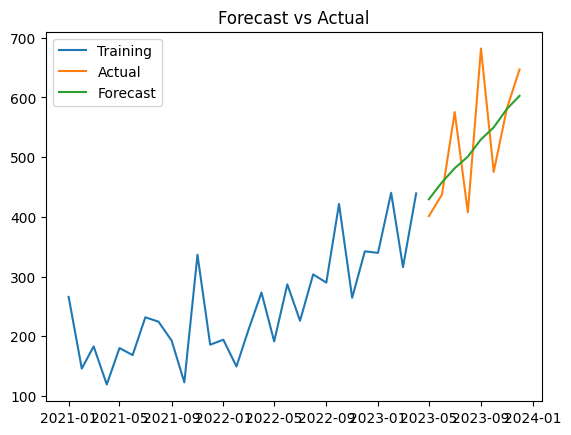

In [14]:
predict = model.forecast(len(test))

plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(predict, label = "Forecast")
plt.title("Forecast vs Actual")
plt.legend()
plt.show()